In [1]:
# Ignore SQLITE warnings related to Decimal numbers in the Chinook database
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Inspect the data
inspector = inspect(engine)

In [10]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Using the inspector to print the column names within the 'dow' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [13]:
# Find the most recent date in the data set.
data = session.query(Measurement) 
for info in data:
    print(info.date)

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-30
2010-01-31
2010-02-01
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-07
2010-02-08
2010-02-09
2010-02-11
2010-02-12
2010-02-13
2010-02-14
2010-02-15
2010-02-16
2010-02-17
2010-02-19
2010-02-20
2010-02-21
2010-02-22
2010-02-23
2010-02-24
2010-02-25
2010-02-26
2010-02-28
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-07
2010-03-08
2010-03-09
2010-03-11
2010-03-12
2010-03-13
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-03
2010-04-04
2010-04-05
2010-04-06
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-15

2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-05-31
2015-06-01
2015-06-02
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-07
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-13
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-28
2015-06-29
2015-06-30
2015-07-01
2015-07-02
2015-07-03
2015-07-04
2015-07-05
2015-07-06
2015-07-07
2015-07-08
2015-07-09
2015-07-10
2015-07-11
2015-07-12
2015-07-13
2015-07-14
2015-07-15
2015-07-16
2015-07-17
2015-07-18
2015-07-19
2015-07-20
2015-07-21
2015-07-22
2015-07-23
2015-07-24
2015-07-25
2015-07-26
2015-07-27
2015-07-28
2015-07-29
2015-07-30
2015-07-31
2015-08-01
2015-08-02
2015-08-03
2015-08-04
2015-08-05
2015-08-06
2015-08-07
2015-08-08
2015-08-09
2015-08-10

2011-11-21
2011-11-22
2011-11-23
2011-11-24
2011-11-25
2011-11-26
2011-11-27
2011-11-28
2011-11-29
2011-11-30
2011-12-01
2011-12-02
2011-12-03
2011-12-04
2011-12-05
2011-12-06
2011-12-07
2011-12-08
2011-12-09
2011-12-10
2011-12-11
2011-12-12
2011-12-13
2011-12-14
2011-12-15
2011-12-16
2011-12-17
2011-12-18
2011-12-19
2011-12-20
2011-12-21
2011-12-22
2011-12-23
2011-12-24
2011-12-25
2011-12-26
2011-12-27
2011-12-28
2011-12-29
2011-12-30
2011-12-31
2012-01-01
2012-01-02
2012-01-03
2012-01-04
2012-01-05
2012-01-06
2012-01-07
2012-01-08
2012-01-09
2012-01-10
2012-01-11
2012-01-12
2012-01-13
2012-01-14
2012-01-15
2012-01-16
2012-01-17
2012-01-19
2012-01-20
2012-01-21
2012-01-22
2012-01-23
2012-01-24
2012-01-25
2012-01-26
2012-01-27
2012-01-28
2012-01-29
2012-01-30
2012-01-31
2012-02-01
2012-02-02
2012-02-03
2012-02-04
2012-02-05
2012-02-06
2012-02-07
2012-02-08
2012-02-09
2012-02-10
2012-02-11
2012-02-12
2012-02-13
2012-02-14
2012-02-15
2012-02-16
2012-02-17
2012-02-18
2012-02-19
2012-02-20

2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-01
2017-07-02
2017-07-03
2017-07-04
2017-07-05
2017-07-06
2017-07-07
2017-07-08
2017-07-09
2017-07-10
2017-07-11
2017-07-12
2017-07-13
2017-07-14
2017-07-15
2017-07-16
2017-07-17
2017-07-18
2017-07-19
2017-07-20
2017-07-21
2017-07-22
2017-07-23
2017-07-24
2017-07-25
2017-07-26
2017-07-27
2017-07-28
2017-07-29
2017-07-30
2017-07-31
2010-03-01
2010-03-02
2010-03-03
2010-03-04
2010-03-05
2010-03-06
2010-03-08
2010-03-09
2010-03-10
2010-03-11
2010-03-12
2010-03-14
2010-03-15
2010-03-17
2010-03-18
2010-03-19
2010-03-20
2010-03-21
2010-03-22
2010-03-23
2010-03-24
2010-03-25
2010-03-26
2010-03-27
2010-03-28
2010-03-29
2010-03-30
2010-03-31
2010-04-01
2010-04-02
2010-04-04
2010-04-05
2010-04-06
2010-04-07
2010-04-08
2010-04-09
2010-04-10
2010-04-11
2010-04-12
2010-04-13
2010-04-14
2010-04-15
2010-04-16
2010-04-17
2010-04-18
2010-04-19
2010-04-20
2010-04-21
2010-04-22
2010-04-23
2010-04-24

2015-03-31
2015-04-01
2015-04-02
2015-04-03
2015-04-05
2015-04-06
2015-04-07
2015-04-08
2015-04-09
2015-04-10
2015-04-11
2015-04-12
2015-04-13
2015-04-14
2015-04-15
2015-04-16
2015-04-17
2015-04-19
2015-04-20
2015-04-22
2015-04-23
2015-04-24
2015-04-25
2015-04-26
2015-04-27
2015-04-28
2015-04-29
2015-04-30
2015-05-01
2015-05-03
2015-05-04
2015-05-05
2015-05-06
2015-05-07
2015-05-08
2015-05-09
2015-05-10
2015-05-11
2015-05-12
2015-05-13
2015-05-14
2015-05-15
2015-05-16
2015-05-17
2015-05-18
2015-05-19
2015-05-20
2015-05-21
2015-05-22
2015-05-23
2015-05-24
2015-05-25
2015-05-26
2015-05-27
2015-05-28
2015-05-29
2015-05-30
2015-06-01
2015-06-03
2015-06-04
2015-06-05
2015-06-06
2015-06-08
2015-06-09
2015-06-10
2015-06-11
2015-06-12
2015-06-14
2015-06-15
2015-06-16
2015-06-17
2015-06-18
2015-06-19
2015-06-20
2015-06-21
2015-06-22
2015-06-23
2015-06-24
2015-06-25
2015-06-26
2015-06-27
2015-06-28
2015-06-29
2015-06-30
2015-07-01
2015-07-06
2015-07-08
2015-07-11
2015-07-12
2015-07-13
2015-07-14

2016-12-19
2016-12-20
2016-12-21
2016-12-22
2016-12-23
2016-12-28
2016-12-29
2016-12-30
2017-01-09
2017-01-10
2017-01-11
2017-01-12
2017-01-13
2017-01-17
2017-01-18
2017-01-19
2017-01-20
2017-01-23
2017-01-24
2017-01-25
2017-01-26
2017-01-27
2017-01-30
2017-01-31
2017-02-01
2017-02-02
2017-02-03
2017-02-06
2017-02-07
2017-02-08
2017-02-09
2017-02-10
2017-02-13
2017-02-14
2017-02-15
2017-02-16
2017-02-17
2017-02-21
2017-02-22
2017-02-23
2017-02-24
2017-02-27
2017-02-28
2017-03-01
2017-03-02
2017-03-03
2017-03-06
2017-03-07
2017-03-08
2017-03-09
2017-03-10
2017-03-13
2017-03-14
2017-03-15
2017-03-16
2017-03-17
2017-03-28
2017-03-29
2017-03-30
2017-03-31
2017-04-03
2017-04-04
2017-04-05
2017-04-06
2017-04-07
2017-04-10
2017-04-11
2017-04-12
2017-04-13
2017-04-17
2017-04-18
2017-04-19
2017-04-20
2017-04-21
2017-04-24
2017-04-25
2017-04-27
2017-04-28
2017-06-02
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-09
2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-19
2017-06-20
2017-06-21

2013-07-24
2013-07-25
2013-07-26
2013-07-28
2013-07-29
2013-07-30
2013-07-31
2013-08-01
2013-08-02
2013-08-03
2013-08-04
2013-08-05
2013-08-06
2013-08-07
2013-08-08
2013-08-09
2013-08-10
2013-08-11
2013-08-12
2013-08-13
2013-08-14
2013-08-15
2013-08-16
2013-08-17
2013-08-18
2013-08-19
2013-08-20
2013-08-21
2013-08-22
2013-08-23
2013-08-24
2013-08-25
2013-08-26
2013-08-27
2013-08-28
2013-08-29
2013-08-31
2013-09-01
2013-09-02
2013-09-03
2013-09-04
2013-09-05
2013-09-06
2013-09-07
2013-09-09
2013-09-10
2013-09-11
2013-09-12
2013-09-13
2013-09-14
2013-09-15
2013-09-16
2013-09-17
2013-09-18
2013-09-19
2013-09-20
2013-09-22
2013-09-23
2013-09-25
2013-09-26
2013-09-27
2013-09-28
2013-09-29
2013-09-30
2013-10-01
2013-10-02
2013-10-03
2013-10-04
2013-10-06
2013-10-07
2013-10-08
2013-10-09
2013-10-10
2013-10-11
2013-10-12
2013-10-13
2013-10-14
2013-10-15
2013-10-16
2013-10-17
2013-10-18
2013-10-19
2013-10-20
2013-10-21
2013-10-22
2013-10-23
2013-10-24
2013-10-25
2013-10-26
2013-10-28
2013-10-29

2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-08
2016-10-09
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-15
2016-10-16
2016-10-17
2016-10-18
2016-10-19
2016-10-21
2016-10-22
2016-10-23
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-29
2016-10-30
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
2016-11-06
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-12
2016-11-13
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-19
2016-11-20
2016-11-21
2016-11-22
2016-11-23
2016-11-24
2016-11-25
2016-11-26
2016-11-27
2016-11-28
2016-11-29
2016-11-30
2016-12-01
2016-12-02
2016-12-03
2016-12-04
2016-12-05
2016-12-06
2016-12-07
2016-12-08
2016-12-10
2016-12-11
2016-12-12
2016-12-13
2016-12-14
2016-12-15
2016-12-16
2016-12-17
2016-12-18
2016-12-19
2016-12-20
2016-12-21
2016-12-22
2016-12-23
2016-12-24
2016-12-25
2016-12-26
2016-12-27
2016-12-28
2016-12-29
2016-12-30
2017-01-01
2017-01-03
2017-01-04
2017-01-05
2017-01-06

2014-09-06
2014-09-07
2014-09-08
2014-09-09
2014-09-10
2014-09-11
2014-09-12
2014-09-13
2014-09-14
2014-09-15
2014-09-16
2014-09-17
2014-09-18
2014-09-19
2014-09-20
2014-09-21
2014-09-22
2014-09-23
2014-09-24
2014-09-25
2014-09-26
2014-09-27
2014-09-28
2014-09-29
2014-09-30
2014-10-01
2014-10-02
2014-10-03
2014-10-04
2014-10-05
2014-10-06
2014-10-07
2014-10-08
2014-10-09
2014-10-10
2014-10-11
2014-10-12
2014-10-13
2014-10-14
2014-10-15
2014-10-16
2014-10-17
2014-10-18
2014-10-19
2014-10-20
2014-10-21
2014-10-22
2014-10-23
2014-10-24
2014-10-25
2014-10-26
2014-10-27
2014-10-28
2014-10-29
2014-10-30
2014-10-31
2014-11-01
2014-11-02
2014-11-03
2014-11-04
2014-11-05
2014-11-06
2014-11-07
2014-11-08
2014-11-09
2014-11-10
2014-11-11
2014-11-12
2014-11-13
2014-11-14
2014-11-15
2014-11-16
2014-11-17
2014-11-18
2014-11-19
2014-11-20
2014-11-21
2014-11-22
2014-11-23
2014-11-24
2014-11-25
2014-11-26
2014-11-27
2014-11-28
2014-11-29
2014-11-30
2014-12-01
2014-12-02
2014-12-03
2014-12-04
2014-12-05

2011-03-24
2011-03-25
2011-03-26
2011-03-27
2011-03-28
2011-03-29
2011-03-30
2011-03-31
2011-04-01
2011-04-02
2011-04-03
2011-04-04
2011-04-05
2011-04-06
2011-04-07
2011-04-08
2011-04-09
2011-04-10
2011-04-11
2011-04-12
2011-04-13
2011-04-14
2011-04-15
2011-04-16
2011-04-17
2011-04-18
2011-04-19
2011-04-20
2011-04-21
2011-04-22
2011-04-23
2011-04-24
2011-04-25
2011-04-26
2011-04-27
2011-04-28
2011-04-29
2011-04-30
2011-05-01
2011-05-02
2011-05-03
2011-05-04
2011-05-05
2011-05-06
2011-05-07
2011-05-08
2011-05-09
2011-05-10
2011-05-11
2011-05-12
2011-05-13
2011-05-14
2011-05-15
2011-05-16
2011-05-17
2011-05-18
2011-05-19
2011-05-20
2011-05-21
2011-05-22
2011-05-23
2011-05-24
2011-05-25
2011-05-26
2011-05-27
2011-05-28
2011-05-29
2011-05-30
2011-05-31
2011-06-01
2011-06-02
2011-06-03
2011-06-04
2011-06-05
2011-06-06
2011-06-07
2011-06-08
2011-06-09
2011-06-10
2011-06-11
2011-06-12
2011-06-13
2011-06-14
2011-06-15
2011-06-16
2011-06-17
2011-06-18
2011-06-19
2011-06-20
2011-06-21
2011-06-22

2015-07-24
2015-07-27
2015-07-28
2015-07-30
2015-07-31
2015-08-03
2015-08-04
2015-08-05
2015-08-06
2015-08-13
2015-08-14
2015-08-17
2015-08-19
2015-08-20
2015-08-24
2015-08-25
2015-08-26
2015-08-27
2015-08-28
2015-08-30
2015-09-01
2015-09-02
2015-09-03
2015-09-04
2015-09-14
2015-09-17
2015-09-18
2015-09-21
2015-09-22
2015-09-23
2015-09-24
2015-09-25
2015-10-08
2015-10-09
2015-10-12
2015-10-13
2015-10-14
2015-10-15
2015-10-16
2015-10-19
2015-10-20
2015-10-21
2015-10-22
2015-10-25
2015-10-26
2015-10-28
2015-10-29
2015-10-30
2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-05
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-13
2010-01-14
2010-01-15
2010-01-16
2010-01-17
2010-01-18
2010-01-19
2010-01-20
2010-01-21
2010-01-22
2010-01-23
2010-01-24
2010-01-25
2010-01-26
2010-01-27
2010-01-28
2010-01-29
2010-01-30
2010-01-31
2010-02-01
2010-02-02
2010-02-03
2010-02-04
2010-02-05
2010-02-06
2010-02-08
2010-02-09
2010-02-10
2010-02-11
2010-02-12
2010-02-13

2014-03-23
2014-03-25
2014-03-26
2014-03-27
2014-03-28
2014-03-29
2014-03-31
2014-04-01
2014-04-02
2014-04-03
2014-04-04
2014-04-05
2014-04-06
2014-04-07
2014-04-08
2014-04-09
2014-04-10
2014-04-11
2014-04-12
2014-04-13
2014-04-14
2014-04-15
2014-04-16
2014-04-17
2014-04-18
2014-04-19
2014-04-20
2014-04-21
2014-04-22
2014-04-23
2014-04-24
2014-04-25
2014-04-26
2014-04-27
2014-04-28
2014-04-29
2014-04-30
2014-05-01
2014-05-02
2014-05-03
2014-05-04
2014-05-05
2014-05-06
2014-05-07
2014-05-08
2014-05-09
2014-05-11
2014-05-12
2014-05-13
2014-05-14
2014-05-15
2014-05-16
2014-05-17
2014-05-18
2014-05-19
2014-05-20
2014-05-21
2014-05-22
2014-05-23
2014-05-24
2014-05-25
2014-05-26
2014-05-27
2014-05-28
2014-05-29
2014-05-30
2014-06-01
2014-06-02
2014-06-03
2014-06-04
2014-06-05
2014-06-06
2014-06-07
2014-06-08
2014-06-09
2014-06-10
2014-06-11
2014-06-12
2014-06-13
2014-06-14
2014-06-15
2014-06-16
2014-06-17
2014-06-18
2014-06-19
2014-06-20
2014-06-21
2014-06-22
2014-06-23
2014-06-24
2014-06-25

In [14]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [15]:
# Join the tables and group by station
joined_meas_sta = session.query(Measurement.station, Station.station).all()
joined_meas_sta

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC0051

In [16]:
print(session.query(Measurement.station, Station.station))

SELECT measurement.station AS measurement_station, station.station AS station_station 
FROM measurement, station


In [43]:
one_yr_date = dt.date(2017, 8, 23)-dt.timedelta(days=365)
one_yr_date

datetime.date(2016, 8, 23)

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# starting from the most recent data point in the database. 
data_perc = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= one_yr_date).order_by(Measurement.date).all()
data_perc


len(data_perc)

2230

In [19]:
data_perc_df = pd.DataFrame(data_perc, columns=['date', 'prcp']).fillna(0)
data_perc_df.set_index('date', inplace=True, )
data_perc_df

prcp
date            
2016-08-23  0.00
2016-08-23  0.15
2016-08-23  0.05
2016-08-23  0.00
2016-08-23  0.02
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2230 rows x 1 columns]

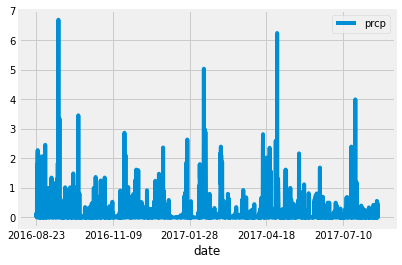

In [20]:
# Plot the results starting from the most recent data point in the database.
# df = pd.DataFrame(last_12, columns=['date', 'prcp'])
# df.set_index('date', inplace=True)
data_perc_df.plot()
# plt.tight_layout()
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_perc_df.describe()

prcp
count  2230.000000
mean      0.160664
std       0.442067
min       0.000000
25%       0.000000
50%       0.010000
75%       0.110000
max       6.700000

# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
station_ct = session.query(Measurement.station).distinct().count()
station_ct

9

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = [func.min(Measurement.tobs),
           func.max(Measurement.tobs),
           func.avg(Measurement.tobs)]
stats = session.query(*station).filter(Measurement.station == "USC00519281").all()
stats

[(54.0, 85.0, 71.66378066378067)]

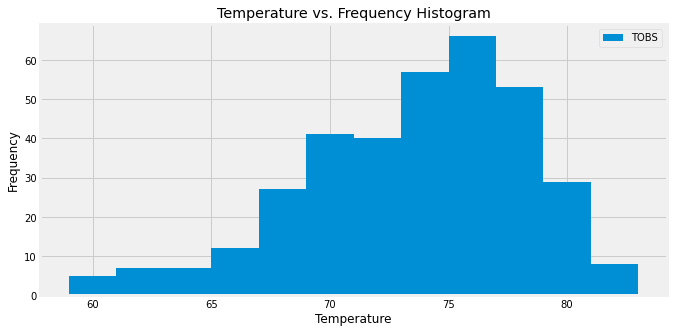

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_yr_date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

# Save the Query Results as a Pandas DataFrame
tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])

# Plot the Results as a Histogram with `bins=12`
tobs_data_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(10,5))
plt.xlabel("Temperature")
# plt.legend(loc="upper right")
# plt.tight_layout()
plt.savefig("temperature_vs_frequency.png")
plt.show()

# Close session

In [48]:
# Close Session
session.close()